**Machine learing algorithms**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import mpl_toolkits
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/house_price/house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<function seaborn.utils.despine>

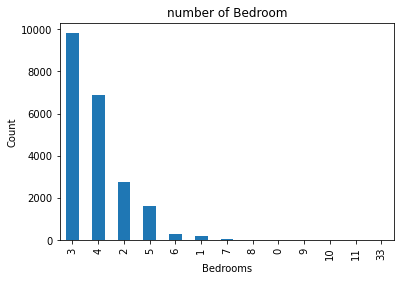

In [ ]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

<function seaborn.utils.despine>

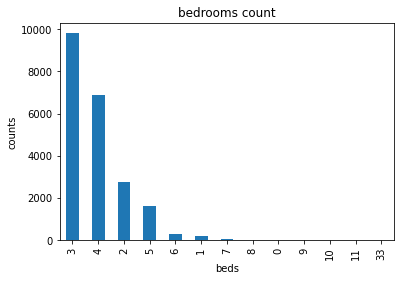

In [ ]:
data['bedrooms'].value_counts().plot(kind="bar")
plt.title('bedrooms count')
plt.xlabel('beds')
plt.ylabel('counts')
sns.despine

Text(0.5, 1.0, 'price vs sqft area')

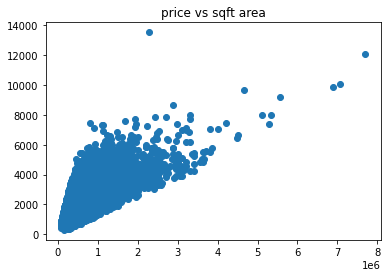

In [ ]:
plt.scatter(data.price, data.sqft_living)
plt.title('price vs sqft area')

Text(0.5, 1.0, 'price vs area of location')

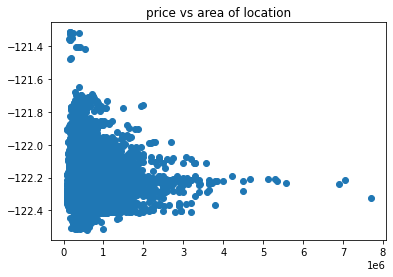

In [ ]:
plt.scatter(data.price, data.long)
plt.title('price vs area of location')

Text(0.5, 1.0, 'price vs latitude')

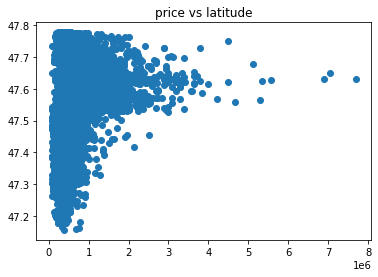

In [ ]:
plt.scatter(data.price, data.lat)
plt.title('price vs latitude')

Text(0.5, 1.0, 'price vs bedroome')

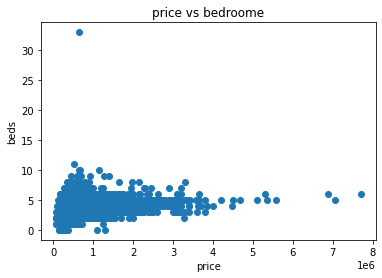

In [ ]:
plt.scatter(data.price, data.bedrooms)
plt.xlabel('price')
plt.ylabel('beds')
plt.title('price vs bedroome')

<function seaborn.utils.despine>

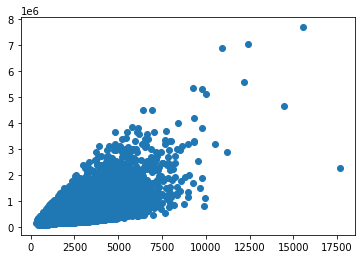

In [ ]:
plt.scatter((data['sqft_living']+data['sqft_basement']),  data['price'])
plt.show
sns.despine

In [ ]:
#train1=data.drop(['id','price'],axis=1);
#train1.head()

In [ ]:
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
labels = data['price']
train1 = data.drop(['id', 'price'],axis=1)
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
train1.shape


(21613, 19)

In [ ]:
labels.shape

(21613,)

In [ ]:
from sklearn.preprocessing import StandardScaler
   
nd = StandardScaler()
nd.fit(train1)
X =nd.transform(train1)
print(X)


[[ 0.         -0.39873715 -1.44746357 ... -0.30607896 -0.9433552
  -0.26071541]
 [ 0.         -0.39873715  0.1756067  ... -0.74634143 -0.43268619
  -0.18786773]
 [ 0.         -1.47395936 -1.44746357 ... -0.13565477  1.07013975
  -0.17237524]
 ...
 [ 0.         -1.47395936 -1.77207762 ... -0.60432128 -1.41025258
  -0.39414129]
 [ 0.         -0.39873715  0.50022075 ...  1.02891048 -0.8412214
  -0.42051149]
 [ 0.         -1.47395936 -1.77207762 ... -0.60432128 -1.41025258
  -0.41794772]]


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lgr = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train1, labels, test_size=0.1, random_state=2)

In [ ]:
lgr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lgr.score(x_test, y_test)

0.7320721056067868

In [ ]:
from sklearn import  ensemble
params = {'n_estimators': 400,
          'max_depth': 5,
          'min_samples_split': 2,
          'learning_rate': 0.1,
          'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

In [ ]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
clf.score(x_test, y_test)

0.9204565913485593

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([ 721473.05786715, 1232821.91860889,  423445.8391622 , ...,
        245808.44218743,  264378.15949264,  524815.50942316])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
mse

11634149760.724129